<a href="https://colab.research.google.com/github/gonzalovaldenebro/NaturalLanguageProcessing-Portfolio/blob/main/F2_4_MarkovModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 195: Natural Language Processing
## Markov Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F2_4_MarkovModels.ipynb)


## References

Markov chain on Wikipedia: https://en.wikipedia.org/wiki/Markov_chain

NLTK Book Chapter 2: Accessing Text Corpora and Lexical Resources https://www.nltk.org/book/ch02.html

What is ChatGPT Doing and Why Does it Work? By Stephen Wolfram: https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/
* This is a fascinating article that covers a lot of NLP topics. The opening motivates text generation with Markov-like descriptions.

In [ ]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Andrey Andreyevich Markov

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/Andrei_Markov.jpg?raw=1" width="200"/>
</div>

image source: https://en.wikipedia.org/wiki/Andrey_Markov

## Markov Chain

A **Markov Chain** describes a sequence of possible events and the probabilities of transitioning from one event state to another.

It can be applied to text - what is the probability that one word follows another?

Here is a diagram which corresponds to this text:

`"I code when I am happy. I am happy therefore I code."`

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/happy_markov_model.png?raw=1"/>
</div>


## Shakespeare Example

To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take Arms against a Sea of troubles

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/to_be_markov_model.png?raw=1"/>
</div>

Transitions here are shown as frequencies instead of probabilities.



## Demo: Let's see how we can construct the model for this text

`"I code when I am happy. I am happy therefore I code."`

We want to represent this model in a data structure - could use 2D-list/matrix or a nested dictionary

Nested dictionary representation


`{
 'I': {'am': 2, 'code': 2},
 'code': {'.': 1, 'when': 1},
 'when': {'I': 1}
 'am': {'happy': 2},
 'happy': {'.': 1, 'therefore': 1},
 'therefore': {'I': 1},
 '.': {'I': 1},
}`


## Digression: Let's talk about those dictionaries


We could use a regular ol dictionary for this. But if you want to use a dictionary to count how many times you see a word, there's something that is kind of annoying about them:


In [ ]:
regular_dict = {}

#...
# I saw "chicken", so let's add on to the "chicken" counter
regular_dict["chicken"] += 1

KeyError: ignored

but it might not already be in the dictionary, so you have to do something like this:

In [ ]:
if "chicken" in regular_dict:
    regular_dict["chicken"] += 1
else:
    regular_dict["chicken"] = 1

print(regular_dict["chicken"])

1


It would be great if it just assumed a missing value was 0 instead of throwing an error!

That's what a `defaultdict` does:

In [ ]:
from collections import defaultdict

my_ddict = defaultdict(int) #we're going to put ints in there - this tells it to make 0 the default

my_ddict["chicken"] += 1

print(my_ddict["chicken"])

1


*👍*

## Training a Markov Model

Before we start training our model, let's make a list the **tokens** - all of the words, punctuation, and other things we want to be the states of the model.

You can use the string `split` method for this:


In [ ]:
text = "I code when I am happy . I am happy therefore I code . "
text_tokens = text.split()

print(text_tokens)

['I', 'code', 'when', 'I', 'am', 'happy', '.', 'I', 'am', 'happy', 'therefore', 'I', 'code', '.']


Now let's build the model using this list

In [ ]:
from collections import defaultdict
from pprint import pprint

# this is our dictionary of dictionaries -
# lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
transition_counts = defaultdict(lambda: defaultdict(int))

for idx in range(len(text_tokens)-1):
    current_token = text_tokens[idx]
    next_token = text_tokens[idx+1]
    transition_counts[current_token][next_token] += 1


pprint(transition_counts)

defaultdict(<function <lambda> at 0x7b36ba93e290>,
            {'.': defaultdict(<class 'int'>, {'I': 1}),
             'I': defaultdict(<class 'int'>, {'code': 2, 'am': 2}),
             'am': defaultdict(<class 'int'>, {'happy': 2}),
             'code': defaultdict(<class 'int'>, {'when': 1, '.': 1}),
             'happy': defaultdict(<class 'int'>, {'.': 1, 'therefore': 1}),
             'therefore': defaultdict(<class 'int'>, {'I': 1}),
             'when': defaultdict(<class 'int'>, {'I': 1})})


## Let's make this into a function

I'll call the list of tokens **corpus** - which is another word for a body of text you use to train a model


In [ ]:
def train_markov_model(corpus):
    # this is our dictionary of dictionaries -
    # lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
    transition_counts = defaultdict(lambda: defaultdict(int))

    for idx in range(len(corpus)-1):
        current_token = corpus[idx]
        next_token = corpus[idx+1]
        transition_counts[current_token][next_token] += 1

    return transition_counts

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles ,"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = train_markov_model(to_be_tokens)

pprint(to_be_model)

defaultdict(<function train_markov_model.<locals>.<lambda> at 0x7b36ba93ea70>,
            {"'tis": defaultdict(<class 'int'>, {'nobler': 1}),
             ',': defaultdict(<class 'int'>, {'or': 2, 'that': 1}),
             ':': defaultdict(<class 'int'>, {'whether': 1}),
             'a': defaultdict(<class 'int'>, {'sea': 1}),
             'against': defaultdict(<class 'int'>, {'a': 1}),
             'and': defaultdict(<class 'int'>, {'arrows': 1}),
             'arms': defaultdict(<class 'int'>, {'against': 1}),
             'arrows': defaultdict(<class 'int'>, {'of': 1}),
             'be': defaultdict(<class 'int'>, {',': 2}),
             'fortune': defaultdict(<class 'int'>, {',': 1}),
             'in': defaultdict(<class 'int'>, {'the': 1}),
             'is': defaultdict(<class 'int'>, {'the': 1}),
             'mind': defaultdict(<class 'int'>, {'to': 1}),
             'nobler': defaultdict(<class 'int'>, {'in': 1}),
             'not': defaultdict(<class 'int'>, {'to': 1}),

## How can we use this model?

We could now make a prediction about the next word in a sequence - like predictive text keyboards

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/predictive_text.png?raw=1"/ width=300>
</div>

### How can we generate a good random *next* word after "to"

Notice this part of the model:

`
'to': defaultdict(<class 'int'>,
    {'be': 2,
    'suffer': 1,
    'take': 1}),
`

So when we see "to", we could
* always predict "be"
* randomly predict based on these possibilities
    * generate a random int between 1 and 4
        - 1: predict "be"
        - 2: predict "be"
        - 3: predict "suffer"
        - 4: predict "take"
    * words that appear after "to" more often a picked more often
    * generates more interesting text than always picking the highest-ranked choice

### coding it up

In [ ]:
import random

def generate_random_next_word(current_word, transition_counts):
    #get the frequency of all words that come after current_word
    possible_words_counts = transition_counts[current_word]
    #print(possible_words_counts)
    #count up the total of all words that come after current_word
    total_occurrences = sum(possible_words_counts.values())

    #print(total_occurrences)
    #we are going to select one occurence randomly
    random_num = random.randint(1,total_occurrences)

    #print("random number generated:", random_num)

    #subtract words counts from our random number until we hit 0
    #this will hit more frequent words proportionally more often
    for word in possible_words_counts:
        random_num = random_num - possible_words_counts[word]
        if random_num <= 0:
            return word

print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )

be
suffer
suffer
take
be
take
be
suffer
be
be


## Generating a whole bunch of text

Now we can write a function that successively calls `generate_random_next_word` to generate a whole sequence of words

In [ ]:
def generate_text(num,start_word,model):
    #a running string to build on with random words
    markov_text = start_word + " "
    curr_word = start_word

    #add num random words onto our running string
    for n in range(num):
        curr_word = generate_random_next_word(curr_word,model)
        markov_text += curr_word
        markov_text += " "

    return markov_text

print( generate_text(30, "to", to_be_model) )

to be , or to be , or to be , or not to suffer the question : whether 'tis nobler in the question : whether 'tis nobler in the question 


This text superficially looks like the training text, but it is nonsense.

Two ways you can improve it:
1. Train it with more text
2. Use more than one word to predict the next word - needs to see lots of examples

## Putting it all together


In [ ]:
from nltk.corpus import gutenberg
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from pprint import pformat

class MarkovModel:

    def __init__(self):
        # empty nested dictionary mapping words to words to ints
        self.transition_counts = defaultdict(lambda: defaultdict(int))

    def train(self,corpus):
        #loop through each word in the corpus record the next word
        #in its frequency dictionary
        for idx in range(len(corpus)-1):
            current_token = corpus[idx]
            next_token = corpus[idx+1]
            self.transition_counts[current_token][next_token] += 1

    def generate_random_next_word(self,current_word):
        #get the frequency of all words that come after current_word
        possible_words_counts = self.transition_counts[current_word]
        #count up the total of all words that come after current_word
        total_occurrences = sum(possible_words_counts.values())

        #we are going to select one occurence randomly
        random_num = random.randint(1,total_occurrences)

        #subtract words counts from our random number until we hit 0
        #this will hit more frequent words proportionally more often
        for word in possible_words_counts:
            random_num = random_num - possible_words_counts[word]
            if random_num <= 0:
                return word

    def generate_text(self,num=100,start_word = "I"):
        #a running string to build on with random words
        markov_text = start_word + " "
        curr_word = start_word

        #add num random words onto our running string
        for n in range(num):
            curr_word = self.generate_random_next_word(curr_word)
            markov_text += curr_word
            markov_text += " "

        return markov_text

    def __str__(self):
        # convert defaultdicts to dicts and format using the pprint formatter
        return pformat({key:dict(self.transition_counts[key]) for key in self.transition_counts})

    def visualize(self,probabilities=False,layout=nx.kamada_kawai_layout):
        # use this method to generate visualizations of small models
        # it will take too long on large texts - don't do it!
        G = nx.DiGraph()

        if probabilities:
            transition_probabilities = defaultdict(dict)
            for current_word, next_words in self.transition_counts.items():
                total_occurrences = sum(next_words.values())
                for next_word, count in next_words.items():
                    transition_probabilities[current_word][next_word] = count / total_occurrences

            for current_word, next_words in transition_probabilities.items():
                for next_word, probability in next_words.items():
                    G.add_edge(current_word, next_word, weight=probability)
        else:
            for current_word, next_words in self.transition_counts.items():
                for next_word, count in next_words.items():
                    G.add_edge(current_word, next_word, weight=count)

        pos = layout(G)
        edge_labels = {edge: f"{G.edges[edge]['weight']}" for edge in G.edges()}
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Markov Model Visualization")
        plt.show()

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)

print(to_be_model)

{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}


## Downloading a corpus from the `nltk` library

`nltk` is the Natural Language Toolkit - lots of great corpora, algorithms, and other resources

They have a sample of free books from [Project Gutenberg](https://www.gutenberg.org/)

You can find a list of the available corpora here: https://www.nltk.org/nltk_data/

In [ ]:
import nltk
nltk.download('gutenberg') # you probably only need to do this once
print( nltk.corpus.gutenberg.fileids() )

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Let's try Moby Dick

In [ ]:
from nltk.corpus import gutenberg
moby_dick = gutenberg.words('melville-moby_dick.txt')
print(moby_dick)

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]


This will only print truncated output, but it's the whole book!

This is a list of tokens - exactly what we need!

In [ ]:
model = MarkovModel()
model.train(moby_dick)

print(str(model)[:10000] )
#print( model ) #uncomment to print the whole model

In [ ]:
print( model.generate_text(100,"I") )

I went in peace . 22 : 24 Then said unto me burnt the King of thy God ? thus saith unto the captivity as often , he and put away thy servants , 5 A little while it out of thy lord of the prophet shall he gathereth not thou hast a devouring fire , the iniquity of them for thee , he did that part of Ammon gathered , it . 22 : follow me ? 21 : 4 : 23 And he made with wormwood , and with you , and returned into the ark of his praise 


## Group Exercise

Load some additional books and train the model with more than one book
* call `model.train` multiple times

What kind of text does your model generate?

In [ ]:
from nltk.corpus import gutenberg
austen_emma = gutenberg.words('austen-emma.txt')
austen_persuasion = gutenberg.words('austen-persuasion.txt')
austen_sense = gutenberg.words('austen-sense.txt')
print(austen_emma)
print(austen_persuasion)
print(austen_sense)

In [ ]:
model = MarkovModel()
model.train(austen_emma)
model.train(austen_persuasion)
model.train(austen_sense)

print(str(model)[:10000] )
#print( model ) #uncomment to print the whole model

In [ ]:
print( model.generate_text(100,"I") )

## Group Exercise

Check out the other examples of corpora here: https://www.nltk.org/book/ch02.html

Can you train and generate other kinds of text?

In [ ]:
from nltk.corpus import webtext

In [ ]:
nltk.download('webtext') # you probably only need to do this once
print( nltk.corpus.webtext.fileids() )

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [ ]:
from nltk.corpus import webtext
firefox = webtext.words('firefox.txt')
grail = webtext.words('grail.txt')
wine = webtext.words('wine.txt')
print(firefox)
print(grail)
print(wine)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', ...]
['Lovely', 'delicate', ',', 'fragrant', 'Rhone', ...]


In [ ]:
model1 = MarkovModel()
model1.train(firefox)
model1.train(grail)
model1.train(wine)

print(str(model1)[:10000] )
#print( model ) #uncomment to print the whole model

{'!': {'"': 2,
       '#': 1,
       "'": 2,
       '(': 1,
       '*': 1,
       '**': 1,
       '***(*)': 1,
       '...': 21,
       'A': 26,
       'ARMY': 2,
       'ARTHUR': 63,
       'Aaaaaaaaah': 1,
       'Aaah': 2,
       'Aaaugh': 1,
       'Aah': 2,
       'Agh': 1,
       'Ahh': 2,
       'Almighty': 1,
       'And': 7,
       'Arthur': 2,
       'As': 1,
       'At': 1,
       'Auuuuuuuugh': 2,
       'BEDEVERE': 15,
       'BLACK': 4,
       'BORS': 1,
       'BRIDGEKEEPER': 3,
       'BROTHER': 1,
       'Bad': 1,
       'Bare': 1,
       'Behold': 1,
       'Bones': 1,
       'Brave': 1,
       'Bring': 1,
       'Brother': 1,
       'Burn': 23,
       'By': 1,
       'CART': 3,
       'CARTOON': 3,
       'CONCORDE': 6,
       'CRONE': 4,
       'CROWD': 7,
       'CUSTOMER': 5,
       'Charge': 1,
       'Chat': 1,
       'Churches': 1,
       'Clear': 2,
       'Come': 4,
       'Concorde': 1,
       'Crapper': 1,
       'Cut': 1,
       'DENNIS': 9,
       'DINGO'

In [ ]:
print( model1.generate_text(100,"I") )

I download Use encryption of the union of individual bookmark separator breaks some time , I type is going to view open NC : Ni cannot be fizzy to bookmark titles ) fruit . ***(*) Rounded , quite dry palate . 9rc Incorrect permissions on about single - navigator . Pleasant , minerals and there ) menus do you must say this apple fruit , briochey . images clicking with "? Add zoon percentage " a program why . Very substantial . Not especially in Print " Phoenix - quite flavoury . Needs Form too wide . Bare ** Frizzante , 


## Group Exercise

Sketch out what this data structure would look like if you wanted to use bigrams (two consecutive words) to predict the next word.

This is called a **2nd-order Markov Model**

`"To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"`

`{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}`


## Applied Exploration

Enhance the `MarkovModel` class to take in a parameter that allows it to be a 1st, 2nd, 3rd, etc. order model.
* Train it with a large corpus (maybe more than one)
* Give examples of the text generated at each order
* Do you run into difficulties with some pairs not being present? How should we deal with those - write down some ideas.



## Example of using the visualizer

['to', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question', ':', 'whether', "'tis", 'nobler', 'in', 'the', 'mind', 'to', 'suffer', 'the', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune', ',', 'or', 'to', 'take', 'arms', 'against', 'a', 'sea', 'of', 'troubles']


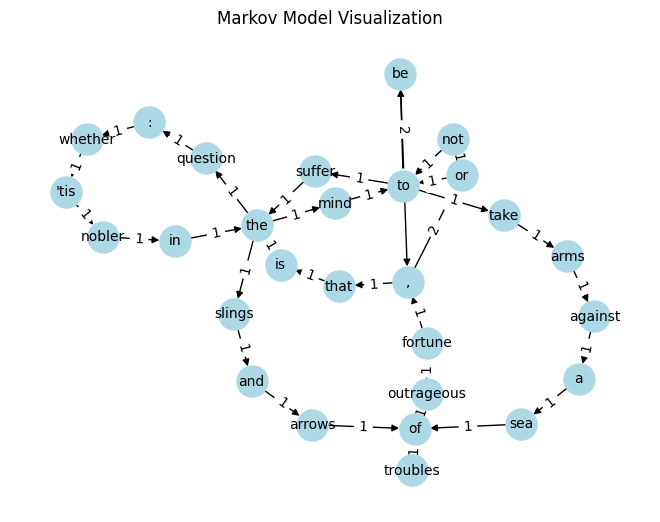

In [ ]:
to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
print(to_be_tokens)

to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)
to_be_model.visualize(probabilities=False)